In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r9-good.csv')
dfm = pd.read_csv('wat-r9-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,129,1,4,0xeae00,1,0,3,2,8,24,8,29,13,121,1,30,34,1,1,1
1,940,1,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,29,37,1,1,1
2,1034,0,3,0xeae40,0,0,3,2,8,0,0,25,9,1018,10,25,30,1,1,1
3,1042,1,0,0xeae40,1,0,3,2,8,25,9,29,13,1038,10,24,30,1,1,1
4,1086,0,1,0xeae40,2,0,3,2,8,29,13,25,9,1078,10,17,30,1,1,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,54,59,6,6,0
1,79,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,33,59,5,6,0
2,80,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,30,59,4,6,0
3,81,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,28,59,3,6,0
4,82,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,27,59,2,6,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,129,1,4,0xeae00,1,0,3,2,8,24,8,29,13,121,1,30,34,1,1,1
1,940,1,2,0xe76c0,1,0,3,2,8,27,11,29,13,928,9,29,37,1,1,1
2,1034,0,3,0xeae40,0,0,3,2,8,0,0,25,9,1018,10,25,30,1,1,1
3,1042,1,0,0xeae40,1,0,3,2,8,25,9,29,13,1038,10,24,30,1,1,1
4,1086,0,1,0xeae40,2,0,3,2,8,29,13,25,9,1078,10,17,30,1,1,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
11331,15,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,54,59,6,6,0
11332,79,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,33,59,5,6,0
11333,80,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,30,59,4,6,0
11334,81,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,28,59,3,6,0
11335,82,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,27,59,2,6,0
11336,86,3,1,0xecf40,3,4,2,4,16,30,14,1,1,66,1,15,59,1,6,0
11337,129,1,4,0xeae00,1,0,3,2,8,24,8,29,13,121,3,55,63,7,7,0
0,129,1,4,0xeae00,1,0,3,2,8,24,8,29,13,121,1,30,34,1,1,1
11338,133,1,4,0x1b7e00,1,0,3,2,9,24,8,29,13,125,2,53,63,6,7,0
11339,185,3,1,0x1b7e00,3,0,0,4,16,29,13,1,1,174,2,27,63,5,7,0


In [13]:
df.to_csv('wat-r9-pkt.csv',index=False)

In [14]:
df = pd.read_csv("wat-r9-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,15,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,54,59,6,6,0
1,79,3,1,0xecf40,3,0,0,4,16,30,14,1,1,66,1,33,59,5,6,0
2,80,3,1,0xecf40,3,1,1,4,16,30,14,1,1,66,1,30,59,4,6,0
3,81,3,1,0xecf40,3,2,1,4,16,30,14,1,1,66,1,28,59,3,6,0
4,82,3,1,0xecf40,3,3,1,4,16,30,14,1,1,66,1,27,59,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,3251443,1,2,0x1152c0,5,2,1,2,8,27,11,29,13,3251417,10026,21,42,1,1,1
23677,3251450,1,2,0x1152c0,5,3,1,2,8,27,11,29,13,3251417,10026,17,42,1,1,1
23678,3251457,1,2,0x1152c0,5,4,2,2,8,27,11,29,13,3251417,10026,10,42,1,1,1
23679,3251458,1,2,0x4d2c0,1,0,3,2,9,27,11,29,13,3251418,10027,9,42,1,1,1


In [15]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.133485,0.099668,0.081982,0.005533,-0.008073,-0.330729,-0.296865,-0.082259,-0.118969,0.202486,0.190144,1.000000,0.983343,-0.092774,-0.152485,-0.329257,-0.395725,0.140655
outport,-0.133485,1.000000,-0.295896,0.307935,-0.186083,0.271912,0.404368,0.561230,0.421626,0.446415,-0.853095,-0.743283,-0.133481,-0.131325,0.095419,0.281716,0.104448,0.172085,-0.083225
inport,0.099668,-0.295896,1.000000,-0.090472,0.066780,-0.097582,-0.209969,-0.406503,-0.429841,-0.473292,0.254228,0.213391,0.099665,0.098316,-0.062548,-0.150792,-0.090365,-0.144518,0.046952
packet_type,0.081982,0.307935,-0.090472,1.000000,0.336569,-0.491807,-0.140515,-0.164498,0.258498,0.219854,-0.161028,-0.115541,0.081986,0.088438,0.038010,0.027788,-0.055899,-0.080411,0.038559
flit_id,0.005533,-0.186083,0.066780,0.336569,1.000000,-0.101684,0.073195,-0.064230,-0.062005,-0.067509,0.197764,0.204593,0.005528,0.005983,-0.016897,0.027422,-0.006417,0.027543,-0.008067
flit_type,-0.008073,0.271912,-0.097582,-0.491807,-0.101684,1.000000,-0.106956,0.093855,0.090604,0.098647,-0.288981,-0.298959,-0.008077,-0.008743,-0.081842,0.058935,-0.059238,-0.004454,0.011788
vnet,-0.330729,0.404368,-0.209969,-0.140515,0.073195,-0.106956,1.000000,0.888803,0.196317,0.295337,-0.563132,-0.516876,-0.330727,-0.335155,0.187594,0.317689,0.335594,0.426963,-0.208369
vc,-0.296865,0.561230,-0.406503,-0.164498,-0.064230,0.093855,0.888803,1.000000,0.272549,0.348409,-0.666355,-0.609339,-0.296863,-0.300635,0.142769,0.289601,0.299555,0.398386,-0.185349
src_ni,-0.082259,0.421626,-0.429841,0.258498,-0.062005,0.090604,0.196317,0.272549,1.000000,0.983776,-0.182547,-0.070296,-0.082255,-0.075650,0.152250,0.344698,0.052569,0.090928,-0.034244
src_router,-0.118969,0.446415,-0.473292,0.219854,-0.067509,0.098647,0.295337,0.348409,0.983776,1.000000,-0.253574,-0.147319,-0.118965,-0.112182,0.180012,0.401987,0.089318,0.135791,-0.056806


In [16]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [17]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,1,3,0,0,3,2,8,29,13,3,1,6,6
1,3,1,3,0,0,4,16,1,1,66,1,5,6
2,3,1,3,1,1,4,16,1,1,66,1,4,6
3,3,1,3,2,1,4,16,1,1,66,1,3,6
4,3,1,3,3,1,4,16,1,1,66,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,1,2,5,2,1,2,8,29,13,3251417,10026,1,1
23677,1,2,5,3,1,2,8,29,13,3251417,10026,1,1
23678,1,2,5,4,2,2,8,29,13,3251417,10026,1,1
23679,1,2,1,0,3,2,9,29,13,3251418,10027,1,1


In [18]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.25,0.75,0.000000,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000000,0.000000,0.277778,0.277778
1,0.75,0.25,0.500000,0.00,0.000000,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.222222,0.277778
2,0.75,0.25,0.500000,0.25,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.166667,0.277778
3,0.75,0.25,0.500000,0.50,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.111111,0.277778
4,0.75,0.25,0.500000,0.75,0.333333,1.0,1.000,0.034483,0.076923,0.000019,0.000000,0.055556,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,0.25,0.50,0.833333,0.50,0.333333,0.0,0.000,1.000000,1.000000,0.999990,0.973585,0.000000,0.000000
23677,0.25,0.50,0.833333,0.75,0.333333,0.0,0.000,1.000000,1.000000,0.999990,0.973585,0.000000,0.000000
23678,0.25,0.50,0.833333,1.00,0.666667,0.0,0.000,1.000000,1.000000,0.999990,0.973585,0.000000,0.000000
23679,0.25,0.50,0.166667,0.00,1.000000,0.0,0.125,1.000000,1.000000,0.999991,0.973682,0.000000,0.000000


In [19]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.295896,0.307935,-0.186083,0.271912,0.404368,0.561230,-0.853095,-0.743283,-0.133481,-0.131325,0.104448,0.172085,-0.083225
1,-0.295896,1.000000,-0.090472,0.066780,-0.097582,-0.209969,-0.406503,0.254228,0.213391,0.099665,0.098316,-0.090365,-0.144518,0.046952
2,0.307935,-0.090472,1.000000,0.336569,-0.491807,-0.140515,-0.164498,-0.161028,-0.115541,0.081986,0.088438,-0.055899,-0.080411,0.038559
3,-0.186083,0.066780,0.336569,1.000000,-0.101684,0.073195,-0.064230,0.197764,0.204593,0.005528,0.005983,-0.006417,0.027543,-0.008067
4,0.271912,-0.097582,-0.491807,-0.101684,1.000000,-0.106956,0.093855,-0.288981,-0.298959,-0.008077,-0.008743,-0.059238,-0.004454,0.011788
5,0.404368,-0.209969,-0.140515,0.073195,-0.106956,1.000000,0.888803,-0.563132,-0.516876,-0.330727,-0.335155,0.335594,0.426963,-0.208369
6,0.561230,-0.406503,-0.164498,-0.064230,0.093855,0.888803,1.000000,-0.666355,-0.609339,-0.296863,-0.300635,0.299555,0.398386,-0.185349
7,-0.853095,0.254228,-0.161028,0.197764,-0.288981,-0.563132,-0.666355,1.000000,0.980579,0.202482,0.202851,-0.184852,-0.258627,0.123712
8,-0.743283,0.213391,-0.115541,0.204593,-0.298959,-0.516876,-0.609339,0.980579,1.000000,0.190141,0.191124,-0.176762,-0.241680,0.114866
9,-0.133481,0.099665,0.081986,0.005528,-0.008077,-0.330727,-0.296863,0.202482,0.190141,1.000000,0.983343,-0.329257,-0.395724,0.140655


In [20]:
train_Y = df['target']

In [21]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
23676    1
23677    1
23678    1
23679    1
23680    1
Name: target, Length: 23681, dtype: int64

In [22]:
pca = PCA(0.95)

In [23]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
principal_components = pca.transform(train_X)
principal_components

array([[ 0.23794304, -0.36629487,  1.10720675, -0.24481462,  0.1163936 ,
         0.00740472],
       [ 1.74241843, -0.40809239, -0.21079525,  0.61835534, -0.06982529,
         0.83199089],
       [ 1.76449043, -0.39115161, -0.2308931 ,  0.2148586 , -0.07331354,
         0.76494474],
       ...,
       [-0.52706171,  0.31347513, -0.53015153, -0.5125022 , -0.11961551,
         0.02145827],
       [-0.2406342 ,  0.80536167,  0.52151115, -0.21838213, -0.20598938,
         0.22398001],
       [ 1.02363169,  1.20789831, -0.43765381, -0.00642887,  0.30739241,
        -0.30266091]])

In [25]:
pca.explained_variance_ratio_

array([0.34031507, 0.19107515, 0.16024336, 0.11726318, 0.08627205,
       0.06545236])

In [26]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

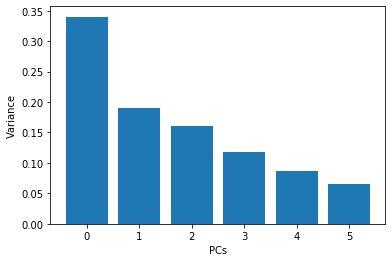

In [27]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [28]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,0.237943,-0.366295,1.107207,-0.244815,0.116394,0.007405
1,1.742418,-0.408092,-0.210795,0.618355,-0.069825,0.831991
2,1.764490,-0.391152,-0.230893,0.214859,-0.073314,0.764945
3,1.719165,-0.475426,-0.375013,0.045537,-0.072121,0.788890
4,1.673840,-0.559701,-0.519134,-0.123784,-0.070927,0.812835
...,...,...,...,...,...,...
23676,-0.507435,0.385375,-0.366357,0.059208,-0.116684,0.059122
23677,-0.550947,0.298817,-0.510265,-0.109559,-0.115809,0.085786
23678,-0.527062,0.313475,-0.530152,-0.512502,-0.119616,0.021458
23679,-0.240634,0.805362,0.521511,-0.218382,-0.205989,0.223980


In [29]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,0.237943,-0.366295,1.107207,-0.244815,0.116394,0.007405,0
1,1.742418,-0.408092,-0.210795,0.618355,-0.069825,0.831991,0
2,1.764490,-0.391152,-0.230893,0.214859,-0.073314,0.764945,0
3,1.719165,-0.475426,-0.375013,0.045537,-0.072121,0.788890,0
4,1.673840,-0.559701,-0.519134,-0.123784,-0.070927,0.812835,0
...,...,...,...,...,...,...,...
23676,-0.507435,0.385375,-0.366357,0.059208,-0.116684,0.059122,1
23677,-0.550947,0.298817,-0.510265,-0.109559,-0.115809,0.085786,1
23678,-0.527062,0.313475,-0.530152,-0.512502,-0.119616,0.021458,1
23679,-0.240634,0.805362,0.521511,-0.218382,-0.205989,0.223980,1


In [30]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,2.171261e-15,-1.622500e-15,-7.417008e-16,7.521299e-16,1.917924e-16,-0.148482
1,2.171261e-15,1.000000e+00,-1.011560e-15,-8.384667e-16,-5.206431e-18,1.272138e-15,0.064880
2,-1.622500e-15,-1.011560e-15,1.000000e+00,-6.624384e-15,-7.753033e-16,-1.420162e-15,0.025631
3,-7.417008e-16,-8.384667e-16,-6.624384e-15,1.000000e+00,-1.156396e-16,7.936057e-16,-0.002971
4,7.521299e-16,-5.206431e-18,-7.753033e-16,-1.156396e-16,1.000000e+00,-3.402757e-16,0.011222
5,1.917924e-16,1.272138e-15,-1.420162e-15,7.936057e-16,-3.402757e-16,1.000000e+00,-0.136628
target,-1.484821e-01,6.488050e-02,2.563134e-02,-2.971323e-03,1.122154e-02,-1.366281e-01,1.000000


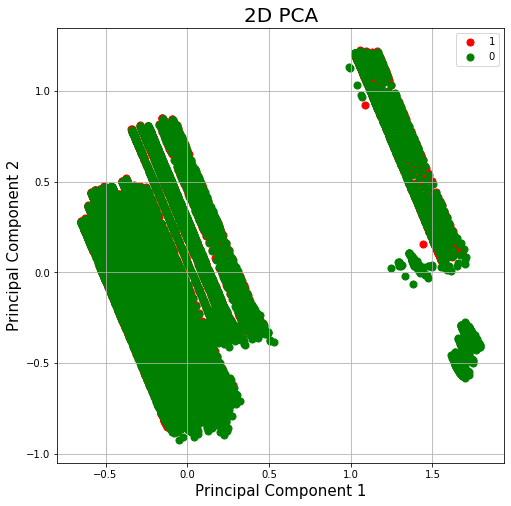

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,3,0,0,3,2,8,1,1,29,13,3,1,54,59,6,6,0
1,3,1,3,0,0,4,16,30,14,1,1,66,1,33,59,5,6,0
2,3,1,3,1,1,4,16,30,14,1,1,66,1,30,59,4,6,0
3,3,1,3,2,1,4,16,30,14,1,1,66,1,28,59,3,6,0
4,3,1,3,3,1,4,16,30,14,1,1,66,1,27,59,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,1,2,5,2,1,2,8,27,11,29,13,3251417,10026,21,42,1,1,1
23677,1,2,5,3,1,2,8,27,11,29,13,3251417,10026,17,42,1,1,1
23678,1,2,5,4,2,2,8,27,11,29,13,3251417,10026,10,42,1,1,1
23679,1,2,1,0,3,2,9,27,11,29,13,3251418,10027,9,42,1,1,1


In [33]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [34]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [35]:
seed = 7
np.random.seed(seed)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [37]:
model = Sequential()

In [38]:
n_cols = train_X.shape[1]
n_cols

13

In [39]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [41]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 9661 samples, validate on 6442 samples
Epoch 1/50
9661/9661 [==============================] - 1s 151us/step - loss: 0.2497 - accuracy: 0.5142 - val_loss: 0.2494 - val_accuracy: 0.5163
Epoch 2/50
9661/9661 [==============================] - 1s 99us/step - loss: 0.2492 - accuracy: 0.5231 - val_loss: 0.2490 - val_accuracy: 0.5256
Epoch 3/50
9661/9661 [==============================] - 1s 96us/step - loss: 0.2487 - accuracy: 0.5238 - val_loss: 0.2486 - val_accuracy: 0.5259
Epoch 4/50
9661/9661 [==============================] - 1s 100us/step - loss: 0.2483 - accuracy: 0.5238 - val_loss: 0.2481 - val_accuracy: 0.5259
Epoch 5/50
9661/9661 [==============================] - 1s 98us/step - loss: 0.2478 - accuracy: 0.5238 - val_loss: 0.2476 - val_accuracy: 0.5259
Epoch 6/50
9661/9661 [==============================] - 1s 99us/step - loss: 0.2472 - accuracy: 0.5241 - val_loss: 0.2471 - val_accuracy: 0.5259
Epoch 7/50
9661/9661 [==============================] - 1s 97us/step - loss: 0.2

In [42]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [43]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.87%


In [44]:
dff = pd.read_csv('wat-r9-pkt.csv',nrows=500)

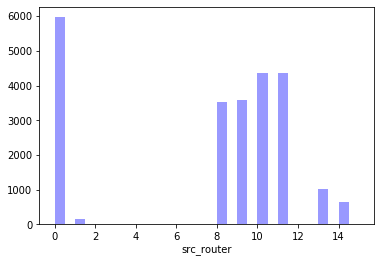

In [45]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

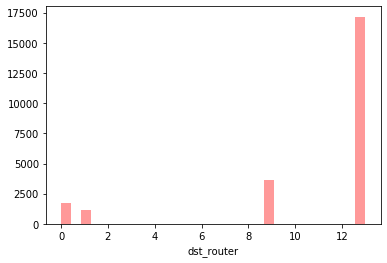

In [46]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

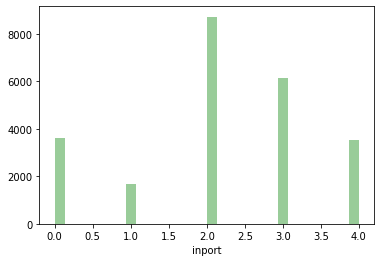

In [47]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

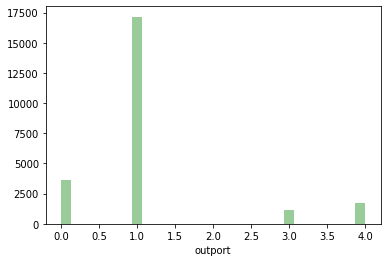

In [48]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

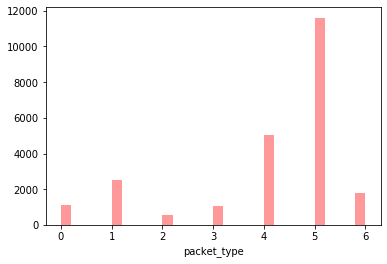

In [49]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')